In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
df = pd.read_csv(r'C:\Users\CHANDRU\Desktop\Anamoly Detection\Train.csv')
test = pd.read_csv(r'C:\Users\CHANDRU\Desktop\Anamoly Detection\Test.csv')

In [3]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(1763, 1559)

In [5]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,...,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,53.094158,126.587067,3.423940,0.724334,0.002836,0.002836,0.007941,0.002269,0.004538,0.012479,...,0.003971,0.005672,0.002836,0.003971,0.003971,0.015315,0.014748,0.009643,0.001134,0.081112
std,55.842014,129.859641,4.566858,0.446976,0.053194,0.053194,0.088783,0.047592,0.067229,0.111041,...,0.062905,0.075121,0.053194,0.062905,0.062905,0.122837,0.120575,0.097750,0.033672,0.273084
min,1.000000,1.000000,0.001500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,33.500000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,96.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,159.000000,4.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['Class'].value_counts(normalize=True)

0    0.918888
1    0.081112
Name: Class, dtype: float64

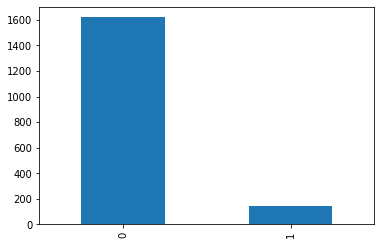

In [7]:
df['Class'].value_counts().plot.bar()

In [8]:
df.dtypes

feature_1         int64
feature_2         int64
feature_3       float64
feature_4         int64
feature_5         int64
                 ...   
feature_1555      int64
feature_1556      int64
feature_1557      int64
feature_1558      int64
Class             int64
Length: 1559, dtype: object

In [9]:
test.shape

(756, 1558)

In [10]:
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = df.drop('Class',1)
y = df['Class']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3,random_state=1234)

In [13]:
y_train.head()

789     1
1576    0
249     0
579     0
962     0
Name: Class, dtype: int64

# Using Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\CHANDRU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = model.predict(x_cv)
accuracy_score(y_cv, y_pred)

0.9281663516068053

In [16]:
from sklearn.model_selection import StratifiedKFold
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl =X.loc[train_index],X.loc[test_index]
    ytr,yvl =y[train_index],y[test_index]
    model=LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5


C:\Users\CHANDRU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.9008498583569405

2 of kfold 5


C:\Users\CHANDRU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.8980169971671388

3 of kfold 5


C:\Users\CHANDRU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.9121813031161473

4 of kfold 5


C:\Users\CHANDRU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score 0.9289772727272727

5 of kfold 5
accuracy_score 0.9119318181818182


C:\Users\CHANDRU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


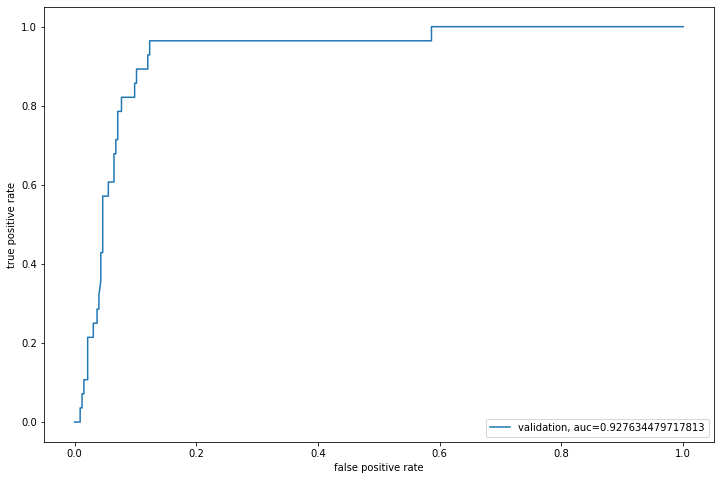

In [17]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

In [18]:
pd.DataFrame(pred_test,columns=['Class']).to_csv('C:/Users/CHANDRU/Desktop/LogisticRegression.csv', index=False)

# Using KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
y_pred1 = model.predict(x_cv)
accuracy_score(y_cv, y_pred1)

0.945179584120983

In [21]:
from sklearn.neighbors import KNeighborsClassifier

i=1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl =X.loc[train_index],X.loc[test_index]
    ytr,yvl =y[train_index],y[test_index]
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
Pred_test = model.predict(test)
Pred1=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8838526912181303

2 of kfold 5
accuracy_score 0.9291784702549575

3 of kfold 5
accuracy_score 0.9036827195467422

4 of kfold 5
accuracy_score 0.9232954545454546

5 of kfold 5
accuracy_score 0.90625


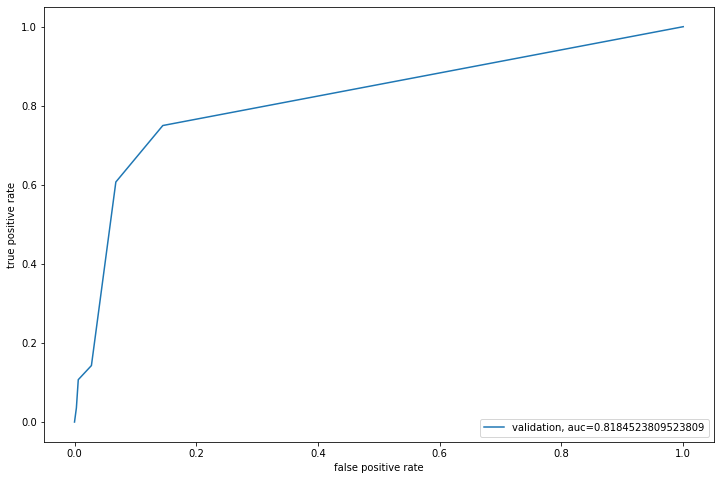

In [22]:
fpr, tpr, _ = metrics.roc_curve(yvl, Pred1)
auc = metrics.roc_auc_score(yvl, Pred1)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y,  test_size=0.3, random_state=1)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [25]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [26]:
from sklearn.neighbors import KNeighborsClassifier

i=1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl =X.loc[train_index],X.loc[test_index]
    ytr,yvl =y[train_index],y[test_index]
    model = KNeighborsClassifier(n_neighbors=20,weights='uniform')
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
Pred_Test = model.predict(test)
Pred2=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8810198300283286

2 of kfold 5
accuracy_score 0.9150141643059491

3 of kfold 5
accuracy_score 0.9263456090651558

4 of kfold 5
accuracy_score 0.9232954545454546

5 of kfold 5
accuracy_score 0.9147727272727273


In [27]:
pd.DataFrame(pred_test,columns=['Class']).to_csv('C:/Users/CHANDRU/Desktop/KNN.csv', index=False)

# Using Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred2 = model.predict(x_cv)
accuracy_score(y_cv, y_pred2)

0.9187145557655955

In [30]:
from sklearn.ensemble import RandomForestClassifier

i=1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl =X.loc[train_index],X.loc[test_index]
    ytr,yvl =y[train_index],y[test_index]
    model= RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_Test = model.predict(test)
pred1=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.9178470254957507

2 of kfold 5
accuracy_score 0.9093484419263456

3 of kfold 5
accuracy_score 0.9093484419263456

4 of kfold 5
accuracy_score 0.9289772727272727

5 of kfold 5
accuracy_score 0.9005681818181818


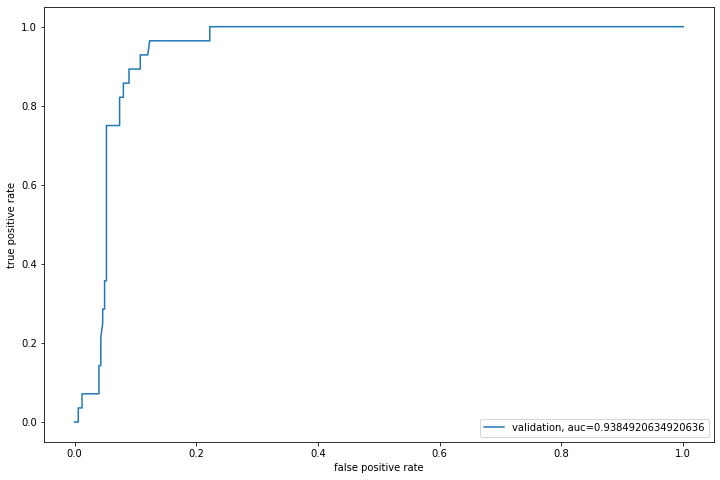

In [31]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred1)
auc = metrics.roc_auc_score(yvl, pred1)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y,  test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                

In [33]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=21,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [34]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl =X.loc[train_index],X.loc[test_index]
    ytr,yvl =y[train_index],y[test_index]
    model= RandomForestClassifier(random_state=1, max_depth=13, n_estimators=21 )
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_Test1 = model.predict(test)
pred2 = model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.9291784702549575

2 of kfold 5
accuracy_score 0.9008498583569405

3 of kfold 5
accuracy_score 0.9178470254957507

4 of kfold 5
accuracy_score 0.9289772727272727

5 of kfold 5
accuracy_score 0.9034090909090909


In [35]:
pd.DataFrame(pred_Test1,columns=['Class']).to_csv('C:/Users/CHANDRU/Desktop/RandomForest.csv', index=False)

# Using Decision Tree

In [36]:
from sklearn import tree
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl =X.loc[train_index],X.loc[test_index]
    ytr,yvl =y[train_index],y[test_index]
    model=tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.8725212464589235

2 of kfold 5
accuracy_score 0.8895184135977338

3 of kfold 5
accuracy_score 0.9008498583569405

4 of kfold 5
accuracy_score 0.9090909090909091

5 of kfold 5
accuracy_score 0.8920454545454546


# Using XG Boost

In [37]:
from xgboost import XGBClassifier

In [38]:
i=1 
kf = StratifiedKFold(n_splits=5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl =X.loc[train_index],X.loc[test_index]
    ytr,yvl =y[train_index],y[test_index]
    model= XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred3 = model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.8923512747875354

2 of kfold 5
accuracy_score 0.9206798866855525

3 of kfold 5
accuracy_score 0.9008498583569405

4 of kfold 5
accuracy_score 0.9261363636363636

5 of kfold 5
accuracy_score 0.9090909090909091


# Using SVM

In [39]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
x_train = sc_x.fit_transform(x_train) 
x_cv = sc_x.transform(x_cv)

In [40]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_cv)

In [41]:
accuracy_score(y_cv, y_pred)

0.9130434782608695